In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv').drop('id', axis=1)

In [3]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ MB


In [5]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [6]:
df.isna().mean()

age                 0.0
gender              0.0
course              0.0
study_hours         0.0
class_attendance    0.0
internet_access     0.0
sleep_hours         0.0
sleep_quality       0.0
study_method        0.0
facility_rating     0.0
exam_difficulty     0.0
exam_score          0.0
dtype: float64

In [7]:
df.select_dtypes('object').columns

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [8]:
for type in df.select_dtypes('object').columns:
    print(df[type].value_counts())

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64
course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64
internet_access
yes    579423
no      50577
Name: count, dtype: int64
sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64
study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64
facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64
exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64


<Axes: >

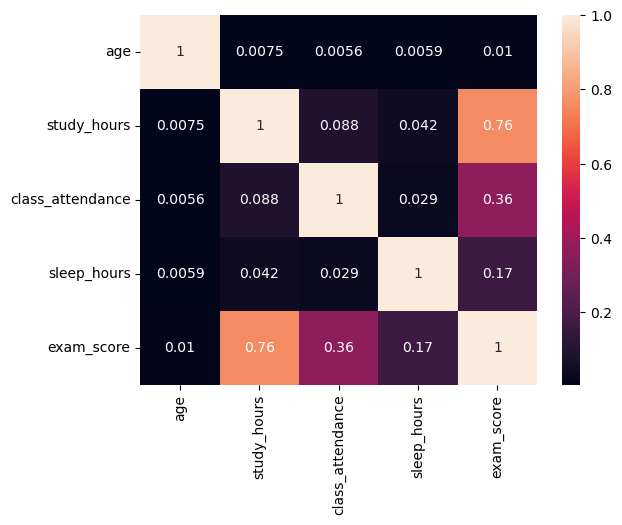

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: >

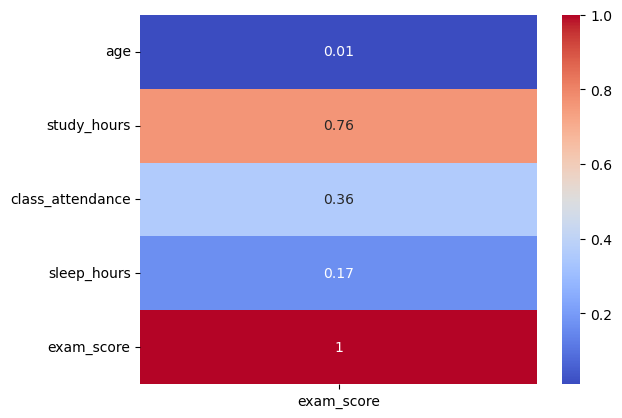

In [ ]:
sns.heatmap(
    df.corr(method='spearman', numeric_only=True)['exam_score'].to_frame(), 
    cmap='coolwarm', 
    annot=True
)

<Axes: xlabel='exam_score', ylabel='Count'>

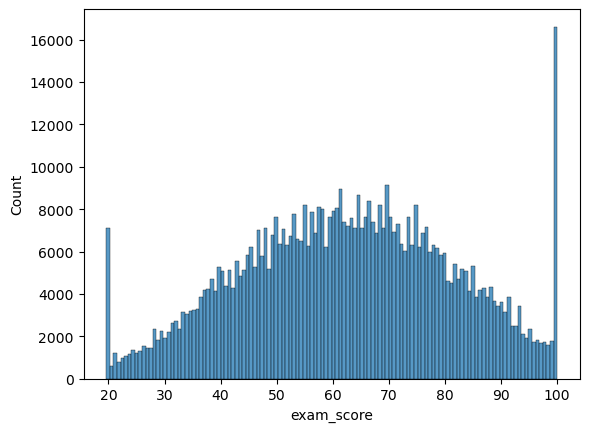

In [10]:
sns.histplot(df['exam_score'])

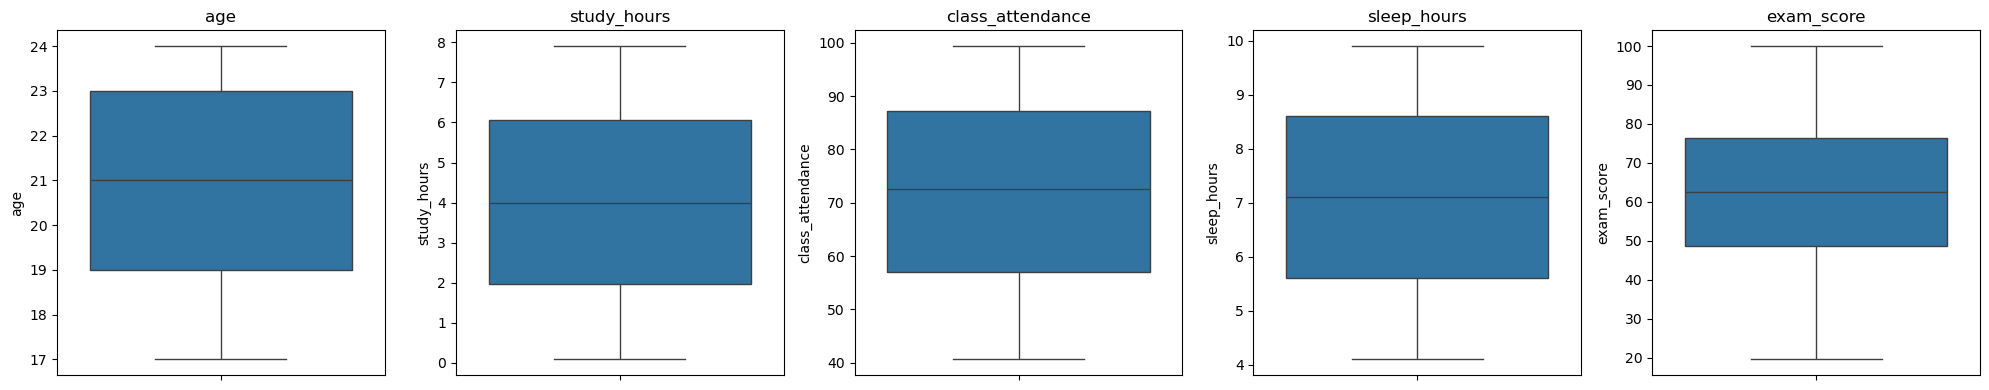

In [16]:
num_cols = df.select_dtypes(exclude='object').columns
fig, ax = plt.subplots(1, len(num_cols), figsize=(4 * len(num_cols), 4))
for i, num_cat in enumerate(num_cols):
    sns.boxplot(df[num_cat], ax=ax[i])
    ax[i].set_title(num_cat)

plt.tight_layout()
plt.show()

In [22]:
df[['age', 'exam_score']].groupby('age').mean()

,exam_score
age,
17,62.492596
18,62.077583
19,61.738998
20,62.537688
21,62.843004
22,63.137706
23,62.876142
24,62.305521


(61.73899832667808, 66.2945911641094)

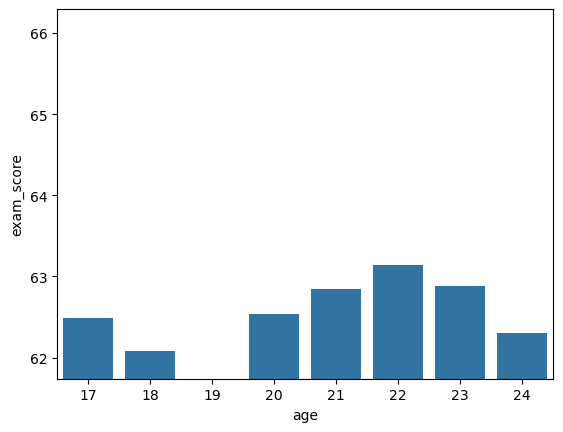

In [31]:
age_scores = df[['age', 'exam_score']].groupby('age').mean()
sns.barplot(data=age_scores, x='age', y='exam_score')
plt.ylim(age_scores['exam_score'].min())